<a href="https://colab.research.google.com/github/eduardoguimaraes90/Machine-Learning-com-Sickit-Learning/blob/main/Machine_Learning_com_Sickit_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de Negócio: usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Carrega o dataset
df_dsa = pd.read_csv('/content/dataset.csv')

In [ ]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

,0
horas_estudo_mes,0
salario,0


In [ ]:
# Correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [ ]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [ ]:
# Resumo estatístico da variável preditora
df_dsa['horas_estudo_mes'].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

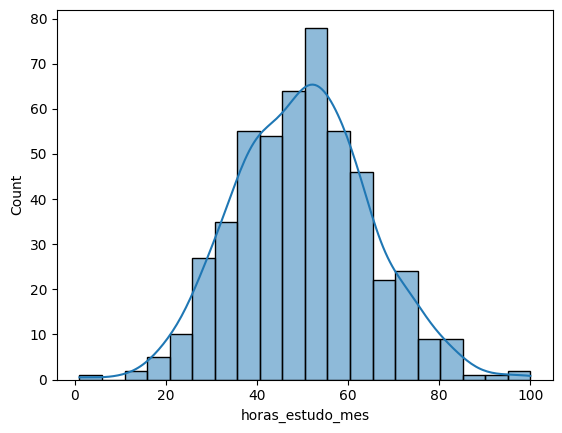

In [ ]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = 'horas_estudo_mes', kde = True) # kde = linha de densidade

In [ ]:
# Prepara a variável de entrada x
x = np.array(df_dsa['horas_estudo_mes']) # Transforma em um array

In [ ]:
type(x) # identifica o tipo

numpy.ndarray

In [ ]:
# Ajusta o shape de x
x = x.reshape(-1, 1)

In [ ]:
# Prepara a variável alvo
y = df_dsa['salario']

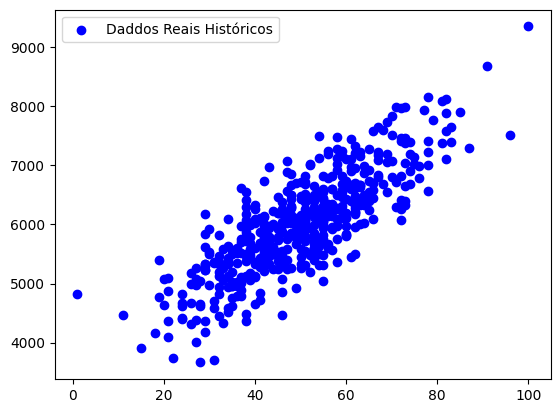

In [ ]:
# Gráfico de dispersão entre x e y
plt.scatter(x, y, color = 'blue', label = 'Daddos Reais Históricos')
plt.xlabel = ('Horas de Estudo')
plt.ylabel = ('Salário')
plt.legend()
plt.show()

In [ ]:
# Dividir os dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, random_state = 42)
# test_size foi 20 % para dados de teste e consequentemente 80 % para dados de treino

In [ ]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression() # cria o objeto "modelo" com base na classe "LinearRegression"

In [ ]:
# Treina o modelo
modelo.fit(x_treino, y_treino)

LinearRegression()

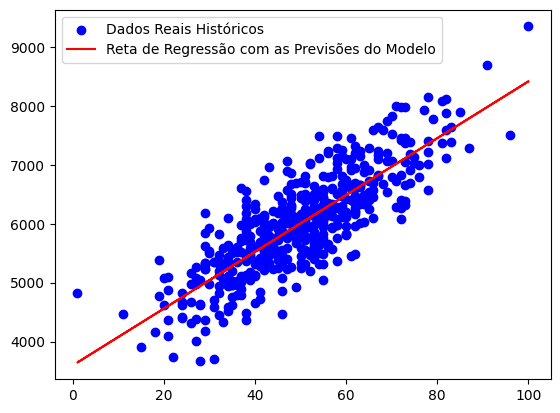

In [ ]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x, y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(x, modelo.predict(x), color = 'red', label = 'Reta de Regressão com as Previsões do Modelo') # dados reais de x com a previsão em y
plt.xlabel = ('Horas de Estudo')
plt.ylabel = ('Salário')
plt.legend()
plt.show()

In [ ]:
# Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente de Determinação (R^2) no conjunto de teste: {score:.2f}')

Coeficiente de Determinação (R^2) no conjunto de teste: 0.59


In [ ]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727545

In [ ]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

In [ ]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Faz a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de', horas_estudo_novo, 'horas por mês, seu salário pode ser igual a', salario_previsto)

Se você estudar cerca de [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]
